### 모듈, 데이터 로딩

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
data = pd.read_csv('galaxy.csv')

### 데이터 확인

In [6]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [8]:
#charCountDescription, upperCaseDescription 편향 확인
#startprice 이상치 확인(999는 이상치일 확률이 많음 -> null로해서 결측치 처리)
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


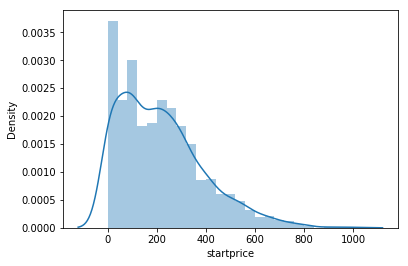

In [9]:
#1000이 넘는 값도 있는 것 확인
#distplot의 line은 추이를 보여줌
sns.distplot(data['startprice'])

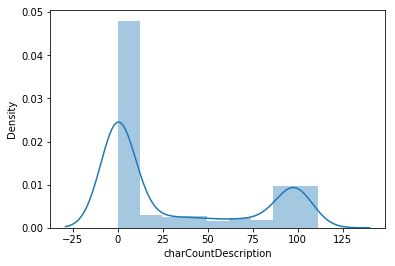

In [10]:
#왜 저런 모양인지 도메인 전문가와 논의
sns.distplot(data['charCountDescription'])

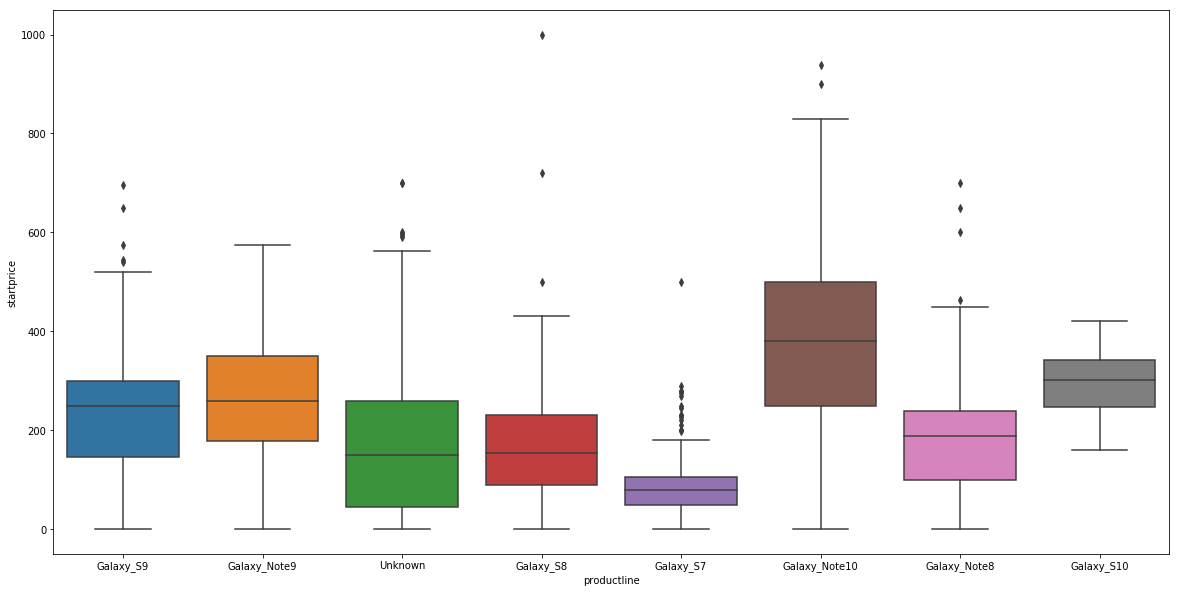

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(x='productline', y='startprice', data = data)

### missing value 처리 -> 비율로 보는게 좋음

In [12]:
data.isna().sum()/len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [13]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [14]:
#NaN값도 unknown으로 채우기
data = data.fillna('Unknown')

In [15]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [16]:
#None값 확인
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

### 카테고리 변수 처리

In [17]:
data[['carrier', 'color','productline','noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [18]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [19]:
#도메인 지식이 있다면 블랙을 같이 볼지, 따로 볼지 등등 협의
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [20]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [21]:
#기능이 있냐 없냐
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

### black 종류 단일화(연습에선 black을 마케팅으로 나눴다고 가정)

In [22]:
def black(x):
    if x=='Midnight Black':
        return 'Black'
    elif x == 'Aura Black':
        return 'Black'
    elif x == 'Prism Black':
        return 'Black'
    else:
        return x

In [23]:
#위 def 정리
#ml, dl에선 연산이 수천, 수만번 걸리기에 조건이 줄수록 좋은 로직
def black(x):
    if (x=='Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black'):
        return 'Black'
    else:
        return x

In [24]:
#in을 이용한 방법
def black(x):
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else:
        return x

In [25]:
#lambda 이용한 wjrdyd
data['color'] = data['color'].apply(lambda x:black(x))

In [26]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [27]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'])

In [28]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,235.00,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,199.99,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,175.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,100.00,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1481,0,239.95,97,5,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1482,0,329.99,93,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### decision tree 모델 만들기

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [32]:
#max_depth : 어디까지 분류할지(안 하면 끝까지 분류함)
model = DecisionTreeClassifier(max_depth=10)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

### 예측 / 검증

In [34]:
pred = model.predict(X_test)

In [35]:
pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int6

In [36]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

### 평가

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(y_test, pred)

0.7946127946127947

### 최적의 maxdepth 찾기

In [39]:
#분류니까 1은 필요없음
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, ':', round(accuracy_score(y_test, pred),3))

2 : 0.818
3 : 0.832
4 : 0.832
5 : 0.825
6 : 0.808
7 : 0.822
8 : 0.795
9 : 0.808
10 : 0.801
11 : 0.798
12 : 0.785
13 : 0.758
14 : 0.761
15 : 0.761
16 : 0.764
17 : 0.764
18 : 0.747
19 : 0.747
20 : 0.761
21 : 0.737
22 : 0.744
23 : 0.744
24 : 0.741
25 : 0.741
26 : 0.751
27 : 0.741
28 : 0.751
29 : 0.761
30 : 0.731


In [40]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test, pred),3))
print(confusion_matrix(y_test, pred))

0.832
[[151  10]
 [ 40  96]]


#### => decisitonTree는 분석 결과를 볼 수 있기에 사용

In [41]:
from sklearn.tree import plot_tree

[Text(418.5, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(209.25, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(104.625, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(52.3125, 67.94999999999999, '0.43\n230\n[158, 72]'),
 Text(156.9375, 67.94999999999999, '0.42\n10\n[3, 7]'),
 Text(313.875, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(261.5625, 67.94999999999999, '0.319\n367\n[294, 73]'),
 Text(366.1875, 67.94999999999999, '0.038\n52\n[51, 1]'),
 Text(627.75, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(523.125, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(470.8125, 67.94999999999999, '0.108\n210\n[12, 198]'),
 Text(575.4375, 67.94999999999999, '0.362\n122\n[29, 93]'),
 Text(732.375, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(680.0625, 67.94999999999999, '0.495\n125\n[69, 56]'),
 Tex

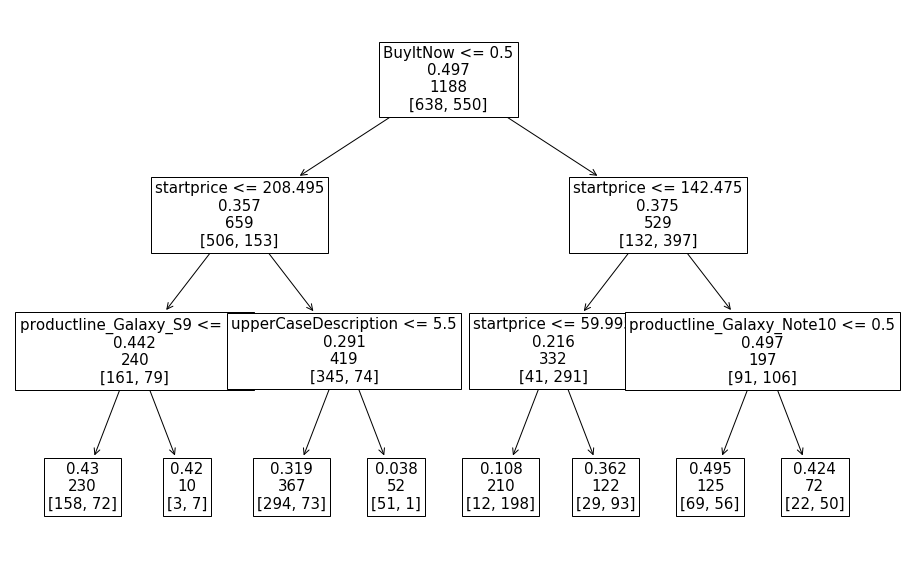

In [43]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label="None")